In [1]:
import os
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

def generate_urls(start_month, start_year, end_month, end_year):
    urls = []
    month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

    for year in range(start_year, end_year + 1):
        if year == start_year:
            month_range = range(start_month, 13)  
        elif year == end_year:
            month_range = range(1, end_month + 1)
        else:
            month_range = range(1, 13)
        for month in month_range:
            if year == end_year and month > end_month:
                continue    
            month_str = month_names[month - 1]  
            month_num_str = f"{month}" 
            urls.append(f"https://www.prt.cl/Descargas/docs/{year}/{month_num_str}.{month_str}/SGPRT_RA2_{month_str.lower()[:3]}-{year}.zip")
            urls.append(f"https://www.prt.cl/Descargas/docs/{year}/{month_num_str}.{month_str}/SGPRT_RA1_{month_str.lower()[:3]}-{year}.zip")
            urls.append(f"https://www.prt.cl/Descargas/docs/{year}/{month_num_str}.{month_str}/SGPRT_RB_{month_str.lower()[:3]}-{year}.zip")
    return urls

start_month = int(input("Ingrese el mes de inicio (1-12): "))  # Ejemplo: 8 para agosto
start_year = int(input("Ingrese el año de inicio (ejemplo: 2024): "))  # Ejemplo: 2024
end_month = int(input("Ingrese el mes de fin (1-12): "))      # Ejemplo: 12 para diciembre
end_year = int(input("Ingrese el año de fin (ejemplo: 2024): "))  # Ejemplo: 2024
urls = generate_urls(start_month, start_year, end_month, end_year)
for url in urls:
    print(url)




https://www.prt.cl/Descargas/docs/2024/1.Enero/SGPRT_RA2_ene-2024.zip
https://www.prt.cl/Descargas/docs/2024/1.Enero/SGPRT_RA1_ene-2024.zip
https://www.prt.cl/Descargas/docs/2024/1.Enero/SGPRT_RB_ene-2024.zip
https://www.prt.cl/Descargas/docs/2024/2.Febrero/SGPRT_RA2_feb-2024.zip
https://www.prt.cl/Descargas/docs/2024/2.Febrero/SGPRT_RA1_feb-2024.zip
https://www.prt.cl/Descargas/docs/2024/2.Febrero/SGPRT_RB_feb-2024.zip
https://www.prt.cl/Descargas/docs/2024/3.Marzo/SGPRT_RA2_mar-2024.zip
https://www.prt.cl/Descargas/docs/2024/3.Marzo/SGPRT_RA1_mar-2024.zip
https://www.prt.cl/Descargas/docs/2024/3.Marzo/SGPRT_RB_mar-2024.zip
https://www.prt.cl/Descargas/docs/2024/4.Abril/SGPRT_RA2_abr-2024.zip
https://www.prt.cl/Descargas/docs/2024/4.Abril/SGPRT_RA1_abr-2024.zip
https://www.prt.cl/Descargas/docs/2024/4.Abril/SGPRT_RB_abr-2024.zip
https://www.prt.cl/Descargas/docs/2024/5.Mayo/SGPRT_RA2_may-2024.zip
https://www.prt.cl/Descargas/docs/2024/5.Mayo/SGPRT_RA1_may-2024.zip
https://www.prt.cl/D

In [2]:
download_folder = "datos_prt"
os.makedirs(download_folder, exist_ok=True)
for url in urls:
    try:
        response = requests.get(url)
        zip_file_path = os.path.join(download_folder, url.split("/")[-1])      
        with open(zip_file_path, "wb") as zip_file:
            zip_file.write(response.content)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(download_folder)
    except Exception as e:
        print(f"Error al descargar o descomprimir {url}: {e}")
dataframes = []
for file in os.listdir(download_folder):
    if file.endswith('.xlsx'):
        df = pd.read_excel(os.path.join(download_folder, file))
        dataframes.append(df)
consolidated_data = pd.concat(dataframes, ignore_index=True)
consolidated_data['MARCA'] = consolidated_data['MARCA'].astype(str)
consolidated_data['MODELO'] = consolidated_data['MODELO'].astype(str)

In [1]:
consolidated_data

NameError: name 'consolidated_data' is not defined

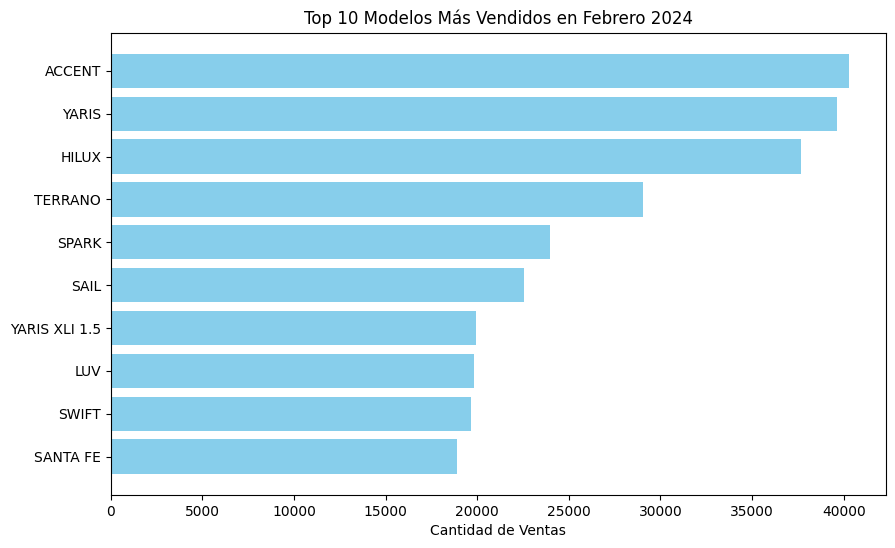

In [8]:
ventas_por_modelo = consolidated_data.groupby(['MARCA', 'MODELO']).size().reset_index(name='Ventas')
top_ventas = ventas_por_modelo.sort_values(by='Ventas', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_ventas['MODELO'], top_ventas['Ventas'], color='skyblue') 
plt.xlabel('Cantidad de Ventas')
plt.title('Top 10 Modelos Más Vendidos en el 2024')
plt.gca().invert_yaxis()  
plt.show()

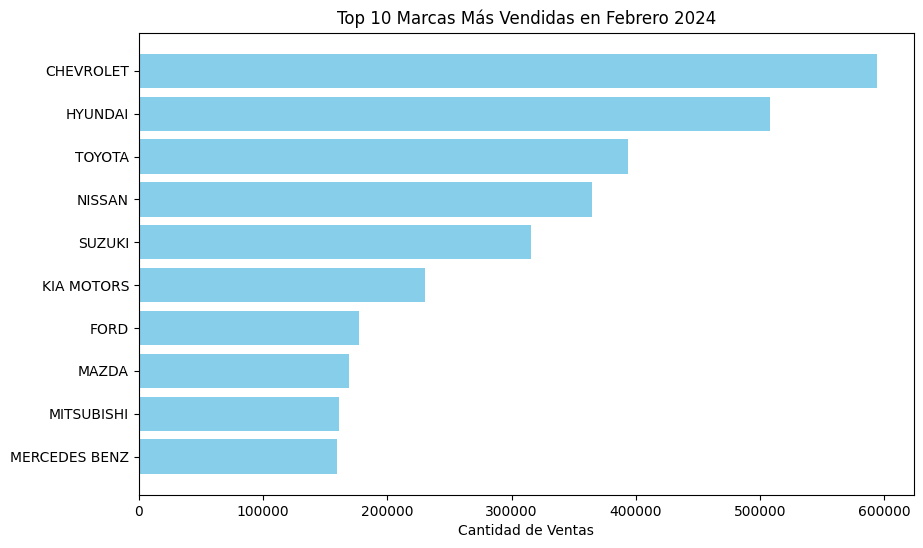

In [9]:
ventas_por_marca = consolidated_data.groupby('MARCA').size().reset_index(name='Ventas')
top_marca = ventas_por_marca.sort_values(by='Ventas', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_marca['MARCA'], top_marca['Ventas'], color='skyblue') 
plt.xlabel('Cantidad de Ventas')
plt.title('Top 10 Marcas Más Vendidas en el 2024')
plt.gca().invert_yaxis() 
plt.show()
